# Week 7
This week we will look into how to balance out imbalanced classes in datasets. And in the second half of the lab, we will implement some clustering algorithms.

# Section 1: Class imbalance handling

A common problem in prediction tasks is class imbalance. This occurs when the classes in your training data are unevenly distributed, for example one class is much more rare than the other. This can lead to the classification algorithm learning better the patterns of the more frequent class, and not being able to correctly classify the more rare class. A way of overcoming this problem is to even out the classes during pre-processing.

We will look at three possible approaches:
- undersampling the more frequent class
- oversampling the more rare class
- SMOTE

We will use functions from the library ["imblearn"](https://imbalanced-learn.org/stable/index.html).

### 1.1 Loading in csv file data

We will use a synthetic dataset which I uploaded to Learn as a csv file. The dataset is called "absent.csv" and it describes how many minutes employees of a company are absent. Please download the file from Learn and then upload it to your Noteable space as follows: 

- navigate to your Noteable folder where you have uploaded this workbook
- on the top right click the upload button and select the "absent.csv" file from your computer
- confirm by clicking the "upload" button which appeared next to the file name

Make sure the file is in the same folder as the workbook, as that will make pathing much easier.

In [3]:
# Note how I read in the csv here:

import pandas as pd

df = pd.read_csv("absent.csv", sep=";", index_col=0)

# Parameters are the file name (with no path as the files are in the same folder), sep is set to ; which is the separater used
# by the file to distinguish between columns, and index_col is set to 0 which tells pandas that the first column is our data index)

The dataset includes the variable "Social smoker" which describes whether the employee smokes or not (binary). Plotting it shows a clear imbalance between the two classes.

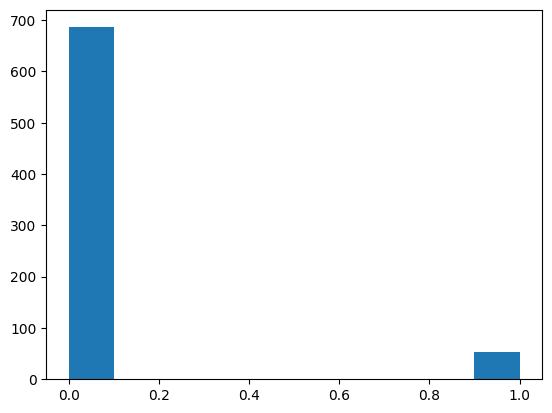

In [4]:
import matplotlib.pyplot as plt

plt.hist(df["Social smoker"])
plt.show()

If we want to use this variable as an outcome variable in our predictive model, it would be much better to even out the two classes.

Let's focus on the three methods of evening out the variable distribution in this task (for illustration purposes) and ignore whether this variable would actually be a good outcome. I will plot the social smoker class in two dimensions for illustration. I chose "Service time" and "Age" but you can choose any two dimensions that you're interested in.

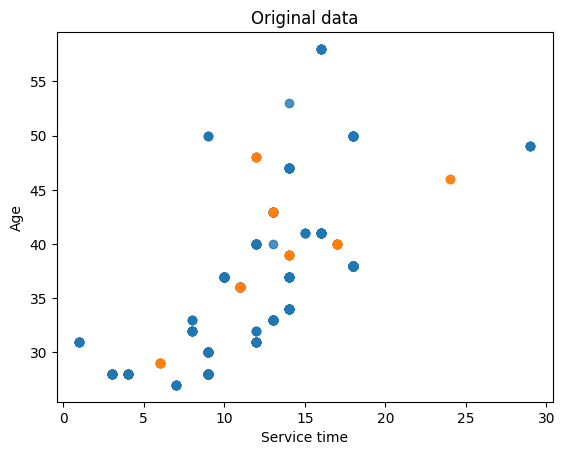

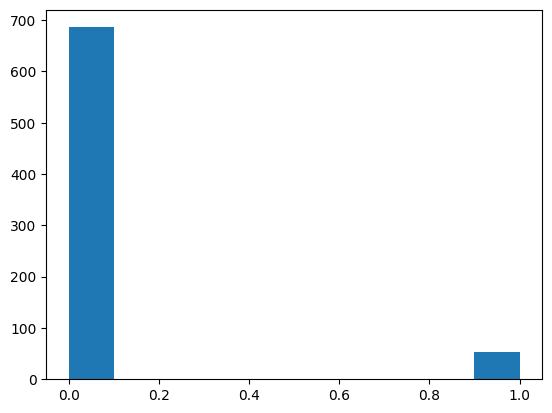

In [20]:
# You can change the variables if you want to look into other independent variables later yourself
var_1 = "Service time"
var_2 = "Age"

# Our independent variables
# convert two variables as a 2-dimensional array
X = df[[var_1, var_2]]

# Our dependent variable
y = df["Social smoker"]

for i in [0, 1]:
    plt.scatter(X[y == i][var_1], X[y == i][var_2], alpha=0.8)

plt.xlabel(var_1)
plt.ylabel(var_2)
plt.title("Original data")
plt.show()



As you can see, the class "Smoker" (orange) is much less frequent than the class "Non-smoker" (blue.) Let's try evening this out.

### 1.2 Undersampling

Undersampling effectively reduces the more frequent class by sampling less frequently from it. We will use the function [RandomUnderSampler()](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html#imblearn.under_sampling.RandomUnderSampler) from the "imblearn" library.

In [5]:
!pip install imblearn
from imblearn.under_sampling import RandomUnderSampler


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     -------------------------------------- 235.6/235.6 kB 2.9 MB/s eta 0:00:00


**TASK**

Implement the function below for our dataset. You can have a look at the examples provided in the documentation [here](https://imbalanced-learn.org/stable/under_sampling.html). Create a scatterplot of the result as we did above to compare them.

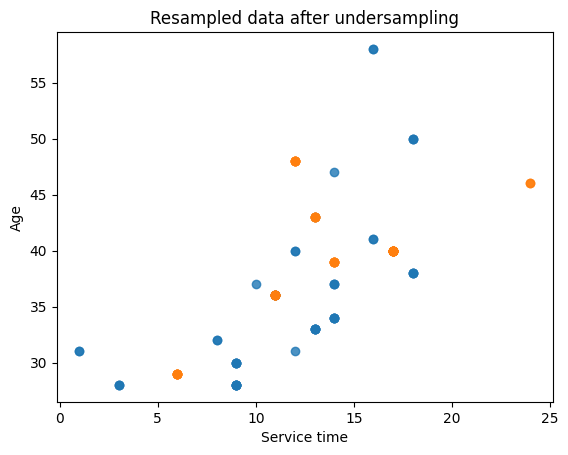

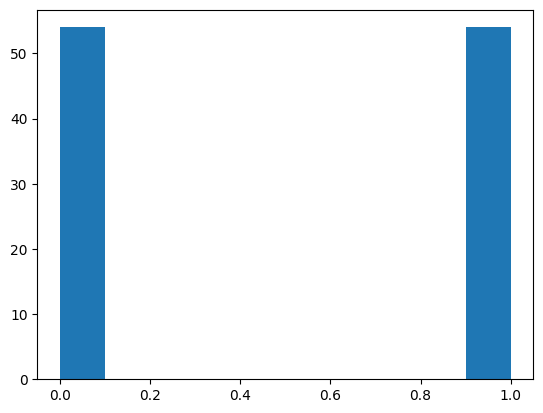

In [24]:
# Initialize the undersampler
rus = RandomUnderSampler(random_state=42)

# Fit and apply the transformation
X_resampled, y_resampled = rus.fit_resample(X, y)

# Plot the resampled data
for i in [0, 1]:
    plt.scatter(
        X_resampled[y_resampled == i][var_1],
        X_resampled[y_resampled == i][var_2],
        alpha=0.8,
    )

plt.xlabel(var_1)
plt.ylabel(var_2)
plt.title("Resampled data after undersampling")
plt.show()

plt.hist(y_resampled)
plt.show()

Note how there are now less blue (non-smooker) points in the scatterplot.

### 1.3 Oversampling

Similar to undersampling, oversampling picks samples at random with replacement and uses that to oversample the less frequent class. It works the same as the undersampling function above using the [RandomOverSampler()](https://imbalanced-learn.org/stable/over_sampling.html) function.

**TASK**

Implement the oversampling function from imblearn for the same dataset and plot the result.

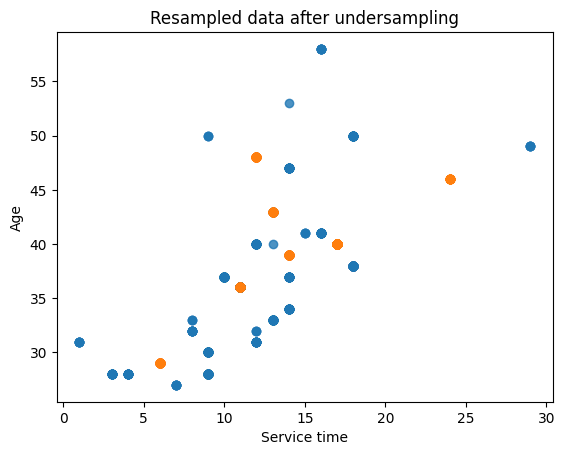

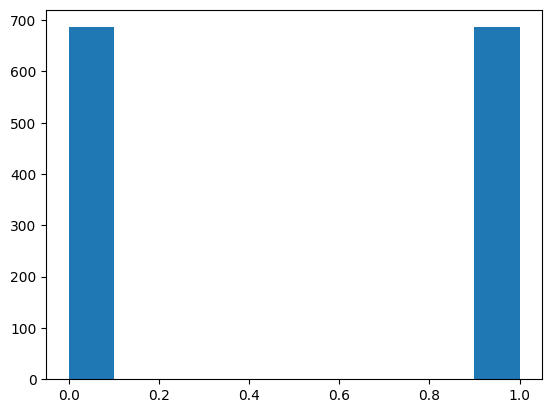

In [23]:
from imblearn.over_sampling import RandomOverSampler

# Initialize the undersampler
rus = RandomOverSampler(random_state=42)

# Fit and apply the transformation
X_resampled, y_resampled = rus.fit_resample(X, y)

# Plot the resampled data
for i in [0, 1]:
    plt.scatter(
        X_resampled[y_resampled == i][var_1],
        X_resampled[y_resampled == i][var_2],
        alpha=0.8,
    )

plt.xlabel(var_1)
plt.ylabel(var_2)
plt.title("Resampled data after undersampling")
plt.show()

plt.hist(y_resampled)
plt.show()

Looking at the scatterplots we can see that nothing really has changed in this case compared to the original data. That is because oversampling just generates more of the same existing (orange) cases and they perfectly overlap in the scatterplot. If you were to create a histogram you could see that we now have even class distribution.

**OPTIONAL TASK**

Create a histogram for the class distribution of Smoker/Non-smoker for the resampled data, to visualise the new class distribution.

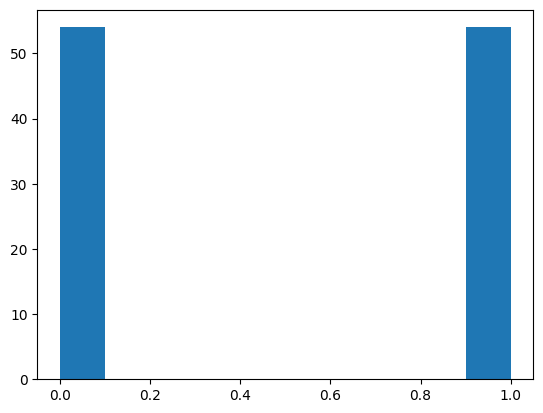

In [25]:
plt.hist(y_resampled)
plt.show()

### 1.3 SMOTE

SMOTE stands for Synthetic Minority Oversampling TEchnique. It combines over- and undersampling, and is a very popular method of finding the middle ground between the two approaches. 

imblearn has two versions of SMOTE implemented which automatically also do some data cleaning in the process. You can read about these two [here](https://imbalanced-learn.org/stable/combine.html).

## There's [SMOTEENN](https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTEENN.html#imblearn.combine.SMOTEENN) and [SMOTETomek](https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTETomek.html#imblearn.combine.SMOTETomek). Both are valid methods to use. The documentation for the methods gives us the hint that "SMOTEENN tends to clean more noisy samples than SMOTETomek".

**TASK**

Choose one of the two proposed SMOTE implementations and implement it below for the dataset. Create a scatterplot of the result and compare it to the others.

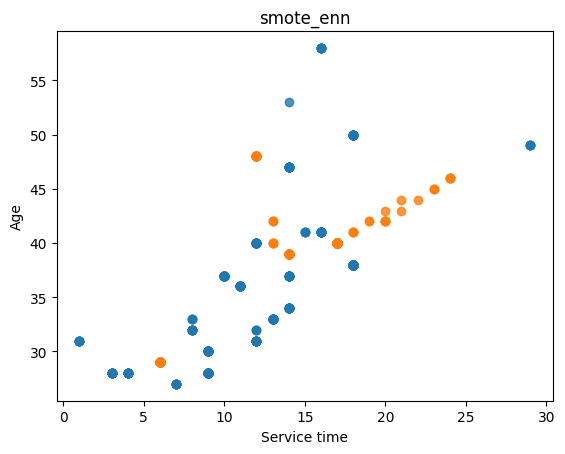

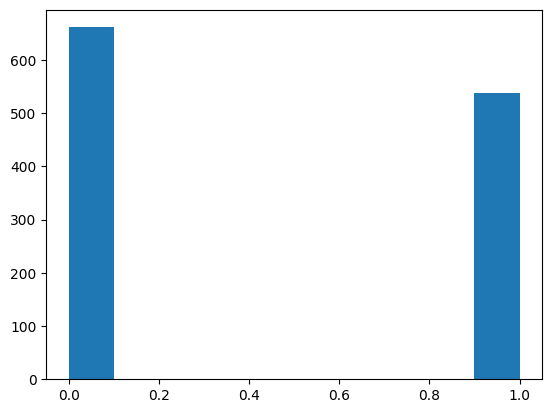

In [30]:
from imblearn.combine import SMOTEENN, SMOTETomek

# 初始化 SMOTEENN 方法
smote_enn = SMOTEENN(random_state=42)

# 初始化 SMOTETomek 方法
smote_tomek = SMOTETomek(random_state=42)

# Fit and apply the transformation
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

# Plot the resampled data
for i in [0, 1]:
    plt.scatter(
        X_resampled[y_resampled == i][var_1],
        X_resampled[y_resampled == i][var_2],
        alpha=0.8,
    )

plt.xlabel(var_1)
plt.ylabel(var_2)
plt.title("smote_enn")
plt.show()

plt.hist(y_resampled)
plt.show()

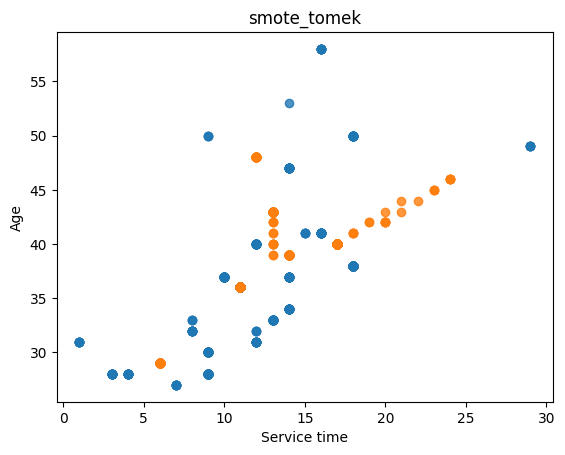

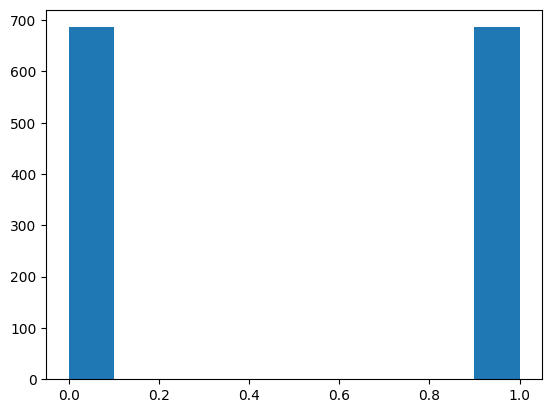

In [32]:
from imblearn.combine import SMOTEENN, SMOTETomek

# Fit and apply the transformation
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

# Plot the resampled data
for i in [0, 1]:
    plt.scatter(
        X_resampled[y_resampled == i][var_1],
        X_resampled[y_resampled == i][var_2],
        alpha=0.8,
    )

plt.xlabel(var_1)
plt.ylabel(var_2)
plt.title("smote_tomek")
plt.show()

plt.hist(y_resampled)
plt.show()

# Section 2: Cluster analysis / k-means

The sklearn package ['cluster'](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster) has a lot of different methods available for easy implementation. The two main ones which you will recognise from the lecture are [k-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) and [agglomerative clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering)

A popular dataset for testing clustering on is the ['make_blobs'](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs) data from sklearn. It allows you to specify the number of datapoints per cluster, the number of dimensions, the spread of the clusters, as well as the number of clusters that should be generated.

**OPTIONAL TASK**

Generate a toy dataset for testing our k-means and agglomerative clustering. You can make it as big or small, as complex or simple as you like. I will demonstrate how to make a dataset of 1000 points, with two dimensions and equally divided between 4 clusters below. You can proceed with this, modify it or create your own instead.

In [33]:
import sklearn.datasets as ds
from pandas import DataFrame

X, true_cluster = ds.make_blobs(
    n_samples=1000, n_features=2, centers=4, random_state=42
)
# note how make_blobs returns two arrays separately: the data location (in 2 dimensions, as X) and the cluster label

# I will for now save my data into a pandas dataframe as that makes plotting it easier
df = DataFrame(dict(x=X[:, 0], y=X[:, 1], true_cluster=true_cluster))

In [34]:
print(df)

            x         y  true_cluster
0   -8.555040  7.064618             3
1   -6.137532 -6.580817             2
2   -6.321300 -6.804104             2
3    4.180518  1.123325             1
4    4.380287  0.470027             1
..        ...       ...           ...
995 -4.818124 -5.671743             2
996 -1.885078  9.642632             0
997  3.690480  4.605552             1
998 -7.489139 -7.067081             2
999 -9.400496  7.114301             3

[1000 rows x 3 columns]


c:\Users\redhawc\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\redhawc\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\redhawc\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='x', ylabel='y'>

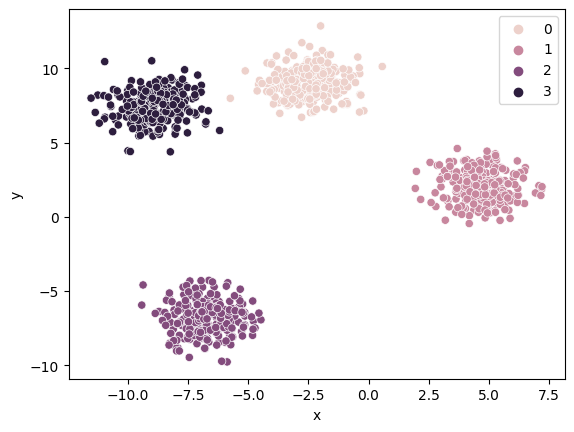

In [35]:
import seaborn as sns

sns.scatterplot(data=df, x="x", y="y", hue=true_cluster)

### 2.1 Implementing k-means

Recall that we can find the documentation for k-means in sklearn [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans).

Have a look at the documentation and how the arguments that the function takes. We will focus on X (our data array), n_clusters (the number of clusters) and n_init, which specifies how many times k-means is restarted with random cluster centers. This is necessary as k-means can sometimes converge to a local optimum only when placing the random initial centroids. Furthermore, random_state let's you set a seed for random starts, to be able to replicate your results.

**TASK**

Implement k-means below using the sklearn function. In this case, pretend that you already know the number of clusters from your data generation earlier. We will learn how to decide k in the next step afterwards.

**OPTIONAL EXTRA TASK**

You can test around with different values for n_init, if you like. The default value is 10, try increasing or decreasing it and monitor your running time. K-means is known to be relatively quick.

c:\Users\redhawc\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\redhawc\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\redhawc\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\redhawc\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depre

<Axes: xlabel='x', ylabel='y'>

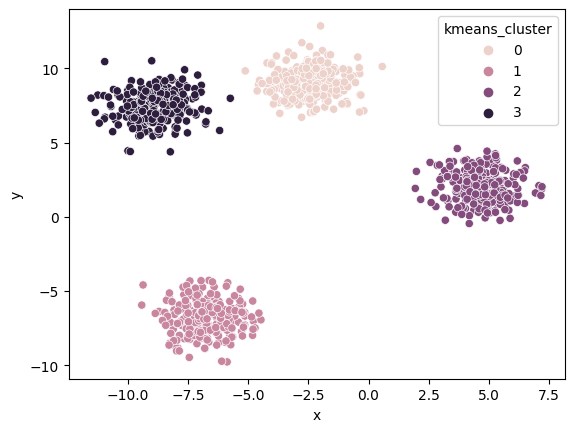

In [41]:
from sklearn.cluster import KMeans

kmeans = KMeans(
    n_clusters=4, random_state=42
)  # 这里的 n_clusters=4 是因为你在 make_blobs 中使用了 centers=4
df["kmeans_cluster"] = kmeans.fit_predict(X)

sns.scatterplot(data=df, x="x", y="y", hue=df["kmeans_cluster"])


c:\Users\redhawc\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\redhawc\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\redhawc\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='x', ylabel='y'>

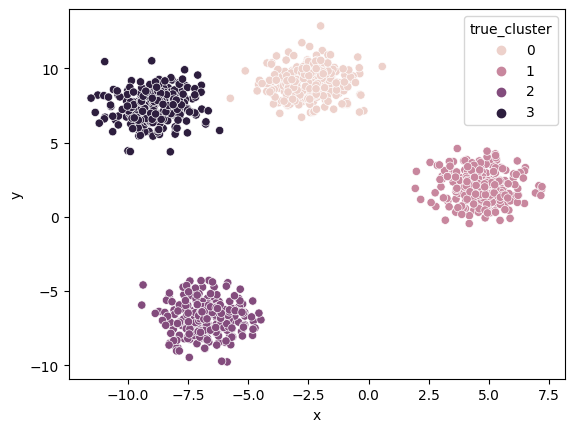

In [42]:
sns.scatterplot(data=df, x="x", y="y", hue=df["true_cluster"])

**TASK**

You can now plot your cluster result as a scatterplot and compare it to your previous plot. 

In [6]:
# ADD YOUR CODE HERE

### 2.2 Selecting number of clusters k

In 2.1 we pretended to already know the number of clusters k, but remember that in the lecture we said that this was actually a challenging step for k-means.

Let's say we don't know k, as would be the case for real data, and we want to know what is the optimal number of it for our data. We will start by implementing the **Elbow criterion** below to choose k.

There is no pretty package implementation for the Elbow criterion because it's not hard to calculate. We just need a plot of the Sum of Squared Error (SSE) for each possible value of k. The SSE is the distance of each datapoint from its centroid (cluster center), so we have to repeatedly run k-means for different configurations of k and then plot all the resulting SSE values.

The good news is that [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) allows us to easily access the SSE via its attribute 'kmeans.inertia_' 

**TASK**

Try implementing the Elbow criterion below for a range of k values, for example from 1 to 10. I recommend writing a for loop which calculates SSE for different values of k, by running the k-means function from earlier, and then plots those values with k on the x-axis and SSE on the y-axis.

In [7]:
# ADD YOUR CODE HERE

### 2.3 k-means evaluation: Silhouette

Have you noticed a problem with our new cluster labels? You might have tried to compare them to the known labels, but there is a problem with that: what was originally cluster 1 might now be *named* cluster 2 even though it is the same cluster. So, different from classification problems, evaluating clusters even if the labels are known is not quite as straightforward. What you can do is check whether the same elements have been assigned to the same cluster together again, but that is tedious work.

So typically, when we want to evaluate our cluster results, we calculate the **Silhouette score** instead. Remember that this could also be used to decide the number of clusters k instead of the Elbow criterion which we used earlier.

Have a look at the scikit learn documentation for its function 'silhouette' in its metrics collection [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html).

**TASK**

Start by just calculating the Silhouette score of your clustering solution above. The silhouette_score function takes your data X as well as the cluster labels from earlier as arguments, and gives back a single numeric value between -1 and 1. The closer to 1, the better the solution.

In [8]:
# ADD YOUR CODE HERE

**OPTIONAL TASK**

If you calculate multiple Silhouette values for different values of k, you can choose the value closest to 1 as the optimal number of k.

You can also look at this extensive and visualised [example](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py) in the scikit learn library, which demonstrates how the Silhouette scores for different configurations can be plotted.

In [9]:
# ADD YOUR CODE HERE

### Additional reading: k-medoids

The scikit learn extension library sklearn_extra also includes an implementation for the [k-medoids algorithm](https://scikit-learn-extra.readthedocs.io/en/stable/generated/sklearn_extra.cluster.KMedoids.html). An alternative implementation of the algorithm is available as its own library with PAM implementation via PyPI, called ['kmedoids'](https://pypi.org/project/kmedoids/). Both work the same way, so there is now major difference regarding which one you should use, but as far as I'm aware the second one implemented the more up-to-date fast running PAM versions, which means it might be faster on large datasets. If you're curious abouot k-medoids/PAM, feel free to test out the implementation of it below on your example data from earlier.

# Section 3: Cluster analysis / agglomerative clustering

Agglomerative clustering is one of the two types of hierarchical clustering you will encounter. It starts with each observation in its own cluster, and then step-wise merges the closest ones until all observations are joined. We can implement it using the corresponding [scikit learn package](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering). 

Note the argument 'linkage' that the function takes: this is your linkage measure, which you will remember from the lecture determines how the distance between the clusters is calculated in determining which ones to merge next.

The other important argument is 'compute_full_tree'. This allows you to either compute the whole dendrogram, or stop early at a pre-determined number of clusters k. You can decide the optimal number of k using for example the silhouette or Elbow criterion from earlier.

**TASK**

Implement below the AgglomerativeClustering() function for our data from above. You can choose any linkage function which you like, I will be using 'average' as this allows me a quite balanced measure. I will also be computing the full tree instead of stopping early, but you can experiment.

In [11]:
# ADD YOUR CODE HERE

**OPTIONAL EXTRA TASK**

You can use the 'dendrogram' function from the [scipy.cluster.hierarchy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) collection to create plots of your dendrogram. 

In [12]:
# ADD YOUR CODE HERE